Problem statement: To build a CNN based model which can accurately detect melanoma. Melanoma is a type of cancer that can be deadly if not detected early. It accounts for 75% of skin cancer deaths. A solution which can evaluate images and alert the dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis.

### Importing Skin Cancer Data
#### To do: Take necessary actions to read the data

### Importing all the important libraries

In [2]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
from glob import glob
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization
from tensorflow.python.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPool2D
from tensorflow.keras.layers.experimental.preprocessing import Rescaling
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam
from keras.callbacks import ReduceLROnPlateau
from keras.utils.np_utils import to_categorical # convert to one-hot-encoding

In [3]:
## If you are using the data by mounting the google drive, use the following :
from google.colab import drive
drive.mount('/content/gdrive')

##Ref:https://towardsdatascience.com/downloading-datasets-into-google-drive-via-google-colab-bcb1b30b0166

Mounted at /content/gdrive


This assignment uses a dataset of about 2357 images of skin cancer types. The dataset contains 9 sub-directories in each train and test subdirectories. The 9 sub-directories contains the images of 9 skin cancer types respectively.

In [4]:
# Defining the path for train and test images
## Todo: Update the paths of the train and test dataset
root_path = '/content/gdrive/MyDrive/SKINCancerDATA'
data_dir_train = pathlib.Path(root_path + '/Train')
data_dir_test = pathlib.Path(root_path + '/Test')

In [5]:
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)

2239
118


### Load using keras.preprocessing

Let's load these images off disk using the helpful image_dataset_from_directory utility.

### Create a dataset

Define some parameters for the loader:

In [6]:
batch_size = 32
img_height = 180
img_width = 180

Use 80% of the images for training, and 20% for validation.

In [7]:
## Write your train dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 2239 files belonging to 9 classes.
Using 1792 files for training.


In [8]:
## Write your validation dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 2239 files belonging to 9 classes.
Using 447 files for validation.


In [9]:
## test dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
test_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_test,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 118 files belonging to 9 classes.


In [10]:
# List out all the classes of skin cancer and store them in a list. 
# You can find the class names in the class_names attribute on these datasets. 
# These correspond to the directory names in alphabetical order.
class_names = train_ds.class_names
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


### Visualize the data
#### Todo, create a code to visualize one instance of all the nine classes present in the dataset

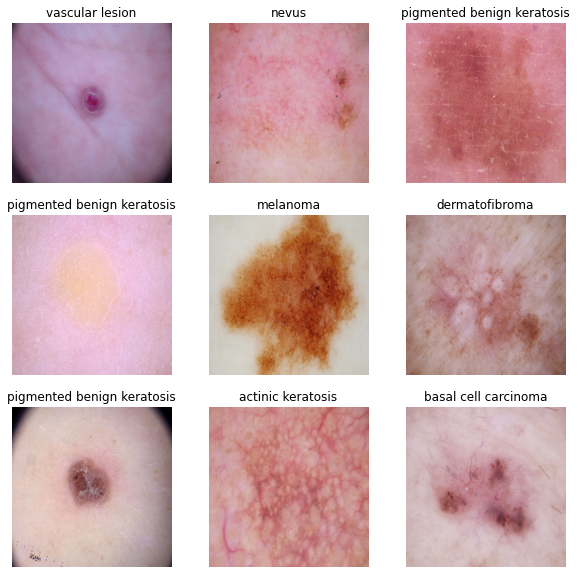

In [ ]:
import matplotlib.pyplot as plt

### your code goes here, you can use training or validation data to visualize
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

The `image_batch` is a tensor of the shape `(32, 180, 180, 3)`. This is a batch of 32 images of shape `180x180x3` (the last dimension refers to color channels RGB). The `label_batch` is a tensor of the shape `(32,)`, these are corresponding labels to the 32 images.

`Dataset.cache()` keeps the images in memory after they're loaded off disk during the first epoch.

`Dataset.prefetch()` overlaps data preprocessing and model execution while training.

In [ ]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

### Create the model
#### Todo: Create a CNN model, which can accurately detect 9 classes present in the dataset. Use ```layers.experimental.preprocessing.Rescaling``` to normalize pixel values between (0,1). The RGB channel values are in the `[0, 255]` range. This is not ideal for a neural network. Here, it is good to standardize values to be in the `[0, 1]`

In [ ]:
### Your code goes here
preprocessing_layers = [
    tf.keras.layers.experimental.preprocessing.Rescaling(1./255, input_shape=(180, 180, 3))
]

input_shape = (180,180,3)
lr = 1e-5
init = 'normal'
activ = 'relu'

model = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=input_shape),
  layers.Conv2D(32, kernel_size=(3, 3), activation='relu'),
  
  layers.MaxPooling2D(),
  layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),

  layers.MaxPooling2D(),
  layers.Conv2D(128, kernel_size=(3, 3), activation='relu'),

  layers.MaxPooling2D(),
  

  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(9)
])

### Compile the model
Choose an appropirate optimiser and loss function for model training 

In [ ]:
### Todo, choose an appropirate optimiser and loss function
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
# View the summary of all layers
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 89, 89, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 87, 87, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 43, 43, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 41, 41, 128)       7

### Train the model

In [ ]:
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
56/56 [==============================] - 390s 4s/step - loss: 2.0818 - accuracy: 0.2087 - val_loss: 1.8455 - val_accuracy: 0.3177
Epoch 2/20
56/56 [==============================] - 154s 3s/step - loss: 1.8529 - accuracy: 0.3153 - val_loss: 1.7111 - val_accuracy: 0.4206
Epoch 3/20
56/56 [==============================] - 149s 3s/step - loss: 1.7393 - accuracy: 0.3839 - val_loss: 1.6484 - val_accuracy: 0.4161
Epoch 4/20
56/56 [==============================] - 147s 3s/step - loss: 1.5882 - accuracy: 0.4319 - val_loss: 1.5321 - val_accuracy: 0.4899
Epoch 5/20
56/56 [==============================] - 146s 3s/step - loss: 1.4931 - accuracy: 0.4671 - val_loss: 1.5134 - val_accuracy: 0.4743
Epoch 6/20
56/56 [==============================] - 148s 3s/step - loss: 1.4104 - accuracy: 0.5061 - val_loss: 1.4595 - val_accuracy: 0.5190
Epoch 7/20
56/56 [==============================] - 157s 3s/step - loss: 1.3040 - accuracy: 0.5301 - val_loss: 1.4551 - val_accuracy: 0.4855
Epoch 8/20
56

### Visualizing training results

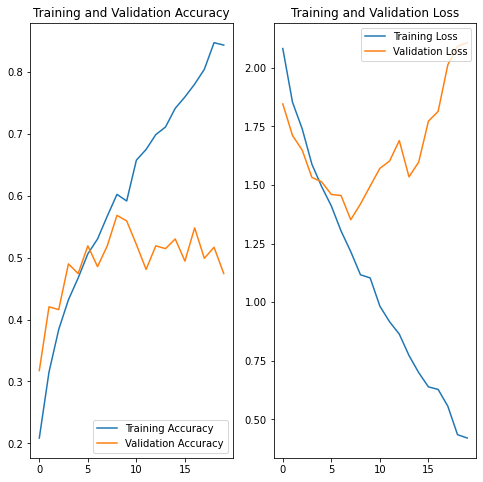

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit

#### Model Overfit or Underfit?

In [ ]:
loss, accuracy = model.evaluate(train_ds, verbose=1,)
loss_v, accuracy_v = model.evaluate(val_ds, verbose=1)

print("Accuracy: ", accuracy)
print("Validation Accuracy: ",accuracy_v)
print("Loss: ",loss)
print("Validation Loss", loss_v)


# Thus we can clearly that model Overfit and we need to chose right data augumentation strategy

14/14 [==============================] - 10s 657ms/step - loss: 2.1067 - accuracy: 0.4743
Accuracy:  0.8203125
Validation Accuracy:  0.4742729365825653
Loss:  0.47463709115982056
Validation Loss 2.1067349910736084


In [ ]:
# Todo, after you have analysed the model fit history for presence of underfit or overfit, choose an appropriate data augumentation strategy. 
# Your code goes here

data_augmentation = tf.keras.Sequential([
  layers.RandomFlip("horizontal_and_vertical"),
  layers.RandomRotation(0.2),
])



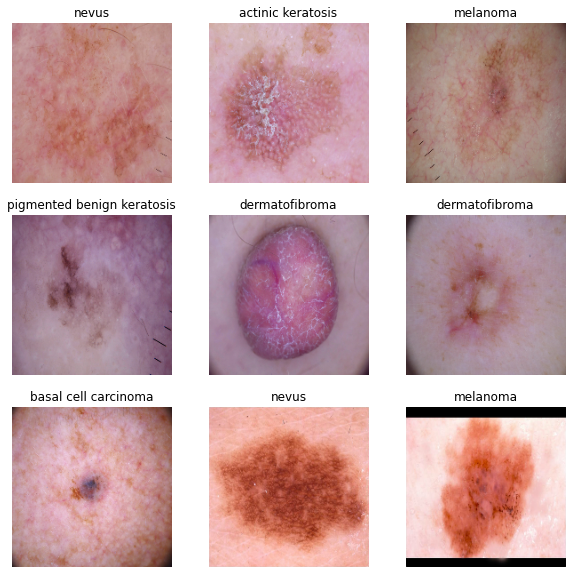

In [ ]:
# visualize how your augmentation strategy works for one instance of training image.
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    augmented_image = data_augmentation(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

### Todo:
### Create the model, compile and train the model


In [ ]:
## You can use Dropout layer if there is an evidence of overfitting in your findings
IMG_SIZE = 180

resize_and_rescale = tf.keras.Sequential([
  layers.Resizing(IMG_SIZE, IMG_SIZE, input_shape=input_shape),
  layers.Rescaling(1./255)
])


model2 = Sequential([
    resize_and_rescale,
    data_augmentation,
  #First convolution layer
  layers.Conv2D(32, kernel_size=(3, 3), activation='relu'),
  # Add Max Pooling
  layers.MaxPooling2D(),
  # Adding Dropout Layer
  layers.Dropout(0.25),

  #second convolution layer
  layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
  # Add Max Pooling
  layers.MaxPooling2D(),
  # Adding Dropout Layer
  layers.Dropout(0.4),
  
  #second convolution layer
  layers.Conv2D(128, kernel_size=(3, 3), activation='relu'),
  # Add Max Pooling
  layers.MaxPooling2D(),
  # Adding Dropout Layer
  layers.Dropout(0.4),

  layers.MaxPooling2D(),
  
  layers.Flatten(),
  layers.Dense(512, activation='relu'),
  # Adding Dropout Layer
  layers.Dropout(0.5),
  layers.Dense(9)
])


### Compiling the model

In [ ]:
## Your code goes here
#optimizer = Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)

#model2.compile(loss='categorical_crossentropy',
 #                optimizer=optimizer,
  #              metrics=['accuracy'])

model2.compile(optimizer='adam',
            loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
          metrics=['accuracy'])

In [ ]:
model2.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_4 (Sequential)   (None, 180, 180, 3)       0         
                                                                 
 sequential_1 (Sequential)   (None, 180, 180, 3)       0         
                                                                 
 conv2d_6 (Conv2D)           (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 89, 89, 32)       0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 89, 89, 32)        0         
                                                                 
 conv2d_7 (Conv2D)           (None, 87, 87, 64)        18496     
                                                      

In order to make the optimizer converge faster and closest to the global minimum of the loss function, i used an annealing method of the learning rate (LR).

The LR is the step by which the optimizer walks through the 'loss landscape'. The higher LR, the bigger are the steps and the quicker is the convergence. However the sampling is very poor with an high LR and the optimizer could probably fall into a local minima.

In [ ]:
# Set a learning rate annealer
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', 
    patience=3, 
    verbose=1, 
    factor=0.5, 
    min_lr=0.00001)

datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images

image_class = ['nevus','melanoma','basal_cell_caricoma','actinic_keratosis','vasc_lesion','dermatofibroma', 'pigmented_keratosis', 'seborrheic_keratosis', 'squamous_carci']

train_batches = datagen.flow_from_directory(data_dir_train, 
    target_size = (180,180),
    classes = image_class,
    batch_size = 64
 )

valid_batches = datagen.flow_from_directory(data_dir_test, 
    target_size = (180,180),
    classes = image_class,
    batch_size = 64
)


Found 890 images belonging to 9 classes.
Found 48 images belonging to 9 classes.


### Training the model

In [30]:
## Your code goes here, note: train your model for 20 epochs
#history = ## your training code
epochs = 20
history = model2.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

#epochs = 20
#batch_size = 10
#history = model2.fit(train_batches,
 # epochs = epochs, verbose = 1, validation_data=valid_batches , callbacks=[learning_rate_reduction])

Epoch 1/20
56/56 [==============================] - 163s 3s/step - loss: 1.2404 - accuracy: 0.5525 - val_loss: 1.3711 - val_accuracy: 0.5235
Epoch 2/20
56/56 [==============================] - 154s 3s/step - loss: 1.2011 - accuracy: 0.5597 - val_loss: 1.3706 - val_accuracy: 0.5123
Epoch 3/20
56/56 [==============================] - 154s 3s/step - loss: 1.1723 - accuracy: 0.5759 - val_loss: 1.4441 - val_accuracy: 0.5257
Epoch 4/20
56/56 [==============================] - 155s 3s/step - loss: 1.1734 - accuracy: 0.5798 - val_loss: 1.3273 - val_accuracy: 0.5481
Epoch 5/20
56/56 [==============================] - 154s 3s/step - loss: 1.1840 - accuracy: 0.5787 - val_loss: 1.4839 - val_accuracy: 0.4810
Epoch 6/20
56/56 [==============================] - 157s 3s/step - loss: 1.1659 - accuracy: 0.5714 - val_loss: 1.4511 - val_accuracy: 0.4765
Epoch 7/20
56/56 [==============================] - 157s 3s/step - loss: 1.2068 - accuracy: 0.5787 - val_loss: 1.3372 - val_accuracy: 0.5347
Epoch 8/20
56

### Visualizing the results

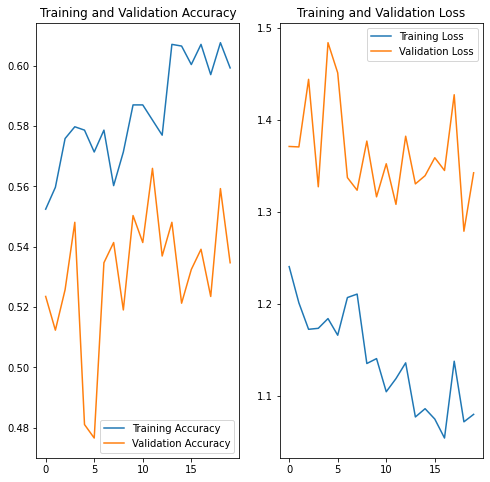

In [31]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [32]:
loss, accuracy = model2.evaluate(train_ds, verbose=1,)
loss_v, accuracy_v = model2.evaluate(val_ds, verbose=1)

print("Accuracy: ", accuracy)
print("Validation Accuracy: ",accuracy_v)
print("Loss: ",loss)
print("Validation Loss", loss_v)

14/14 [==============================] - 8s 587ms/step - loss: 1.3425 - accuracy: 0.5347
Accuracy:  0.6004464030265808
Validation Accuracy:  0.5346755981445312
Loss:  1.177091360092163
Validation Loss 1.3424935340881348


#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit. Do you think there is some improvement now as compared to the previous model run?

## The model has still found to be over fitting, now lets apply batch normalisation and augmentation to see the model behaviour.

#### **Todo:** Find the distribution of classes in the training dataset.
#### **Context:** Many times real life datasets can have class imbalance, one class can have proportionately higher number of samples compared to the others. Class imbalance can have a detrimental effect on the final model quality. Hence as a sanity check it becomes important to check what is the distribution of classes in the data.

<Figure size 720x720 with 0 Axes>

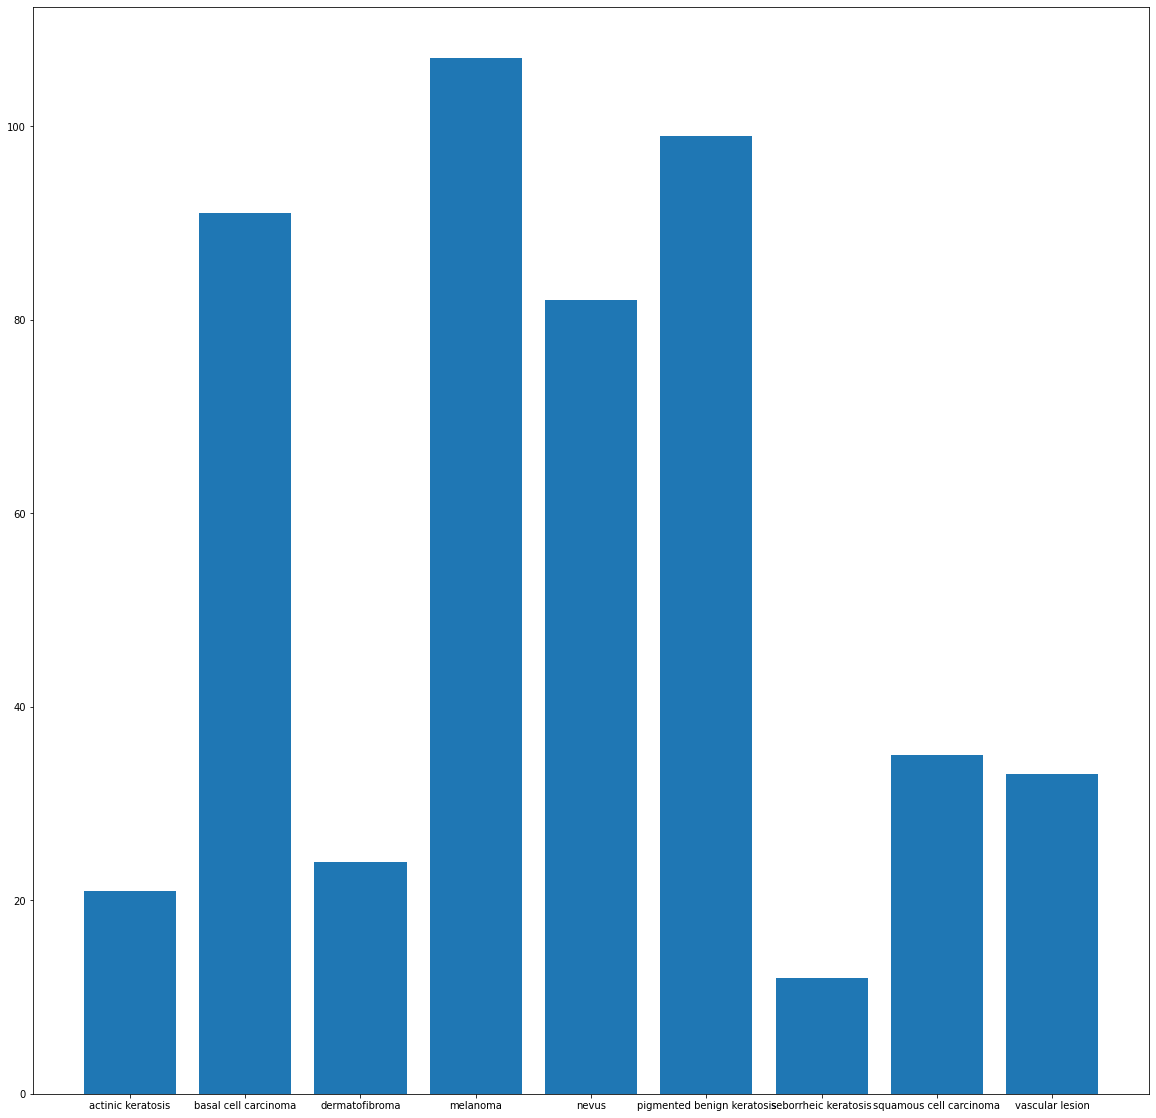

In [11]:
## Your code goes here.
import matplotlib.pyplot as plt
data = dict()

for i in class_names:
  data[i] = []

plt.figure(figsize=(10, 10))
for images, labels in train_ds:
  for i in range(9):
    data[class_names[labels[i]]].append(images[i].numpy().astype("uint8"))

for i in data:
  data[i] = len(data[i]) 

f = plt.figure()
f.set_figwidth(20)
f.set_figheight(20)

plt.bar(range(len(data)), list(data.values()), align='center')
plt.xticks(range(len(data)), list(data.keys()))
plt.show()


#### - Which class has the least number of samples? 
- **Actinic Keratosos** and **Seborrheic keratosis**
#### - Which classes dominate the data in terms proportionate number of samples?
**Pigmented benign keratosis** dominates the data of count more than 100 in training


#### **Todo:** Rectify the class imbalance
#### **Context:** You can use a python package known as `Augmentor` (https://augmentor.readthedocs.io/en/master/) to add more samples across all classes so that none of the classes have very few samples.

In [12]:
!pip install Augmentor

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


To use `Augmentor`, the following general procedure is followed:

1. Instantiate a `Pipeline` object pointing to a directory containing your initial image data set.<br>
2. Define a number of operations to perform on this data set using your `Pipeline` object.<br>
3. Execute these operations by calling the `Pipeline’s` `sample()` method.


In [13]:
path_to_training_dataset="/content/gdrive/MyDrive/SKINCancerDATA/Train/"
# data_dir_train = pathlib.Path(root_path + '/Train')
import Augmentor
for i in class_names:
    p = Augmentor.Pipeline(path_to_training_dataset + i)
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500) ## We are adding 500 samples per class to make sure that none of the classes are sparse.

Initialised with 114 image(s) found.
Output directory set to /content/gdrive/MyDrive/SKINCancerDATA/Train/actinic keratosis/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7FCF00481DF0>: 100%|██████████| 500/500 [00:24<00:00, 20.46 Samples/s]


Initialised with 376 image(s) found.
Output directory set to /content/gdrive/MyDrive/SKINCancerDATA/Train/basal cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7FCF00442DC0>: 100%|██████████| 500/500 [00:25<00:00, 19.80 Samples/s]


Initialised with 95 image(s) found.
Output directory set to /content/gdrive/MyDrive/SKINCancerDATA/Train/dermatofibroma/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7FCF0052AC40>: 100%|██████████| 500/500 [00:20<00:00, 24.04 Samples/s]


Initialised with 438 image(s) found.
Output directory set to /content/gdrive/MyDrive/SKINCancerDATA/Train/melanoma/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7FCF00472EE0>: 100%|██████████| 500/500 [01:39<00:00,  5.03 Samples/s]


Initialised with 357 image(s) found.
Output directory set to /content/gdrive/MyDrive/SKINCancerDATA/Train/nevus/output.

Processing <PIL.Image.Image image mode=RGB size=3072x2304 at 0x7FCF1DDE2C10>: 100%|██████████| 500/500 [01:32<00:00,  5.38 Samples/s]


Initialised with 462 image(s) found.
Output directory set to /content/gdrive/MyDrive/SKINCancerDATA/Train/pigmented benign keratosis/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7FCF00414790>: 100%|██████████| 500/500 [00:19<00:00, 25.95 Samples/s]


Initialised with 77 image(s) found.
Output directory set to /content/gdrive/MyDrive/SKINCancerDATA/Train/seborrheic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7FCF00540B20>: 100%|██████████| 500/500 [00:47<00:00, 10.48 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/gdrive/MyDrive/SKINCancerDATA/Train/squamous cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7FCF00467220>: 100%|██████████| 500/500 [00:20<00:00, 24.77 Samples/s]


Initialised with 139 image(s) found.
Output directory set to /content/gdrive/MyDrive/SKINCancerDATA/Train/vascular lesion/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7FCF00459E20>: 100%|██████████| 500/500 [00:19<00:00, 26.06 Samples/s]


Augmentor has stored the augmented images in the output sub-directory of each of the sub-directories of skin cancer types.. Lets take a look at total count of augmented images.

In [14]:
image_count_train = len(list(data_dir_train.glob('*/output/*.jpg')))
print(image_count_train)

4500


### Lets see the distribution of augmented data after adding new images to the original training data.

In [15]:
path_list = [x for x in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
path_list

['/content/gdrive/MyDrive/SKINCancerDATA/Train/actinic keratosis/output/actinic keratosis_original_ISIC_0027536.jpg_620f7160-9706-43c1-a46e-e5c591564381.jpg',
 '/content/gdrive/MyDrive/SKINCancerDATA/Train/actinic keratosis/output/actinic keratosis_original_ISIC_0028190.jpg_565d3424-bcc3-445d-aa09-c2d82d7a5f79.jpg',
 '/content/gdrive/MyDrive/SKINCancerDATA/Train/actinic keratosis/output/actinic keratosis_original_ISIC_0025957.jpg_7abbcc62-bd93-476d-8706-0115334ce1a4.jpg',
 '/content/gdrive/MyDrive/SKINCancerDATA/Train/actinic keratosis/output/actinic keratosis_original_ISIC_0031823.jpg_0e9826f7-c392-47cc-ab7e-fc58ee5be460.jpg',
 '/content/gdrive/MyDrive/SKINCancerDATA/Train/actinic keratosis/output/actinic keratosis_original_ISIC_0029840.jpg_c832b497-350f-4259-b67c-80535f970095.jpg',
 '/content/gdrive/MyDrive/SKINCancerDATA/Train/actinic keratosis/output/actinic keratosis_original_ISIC_0031609.jpg_1821ef66-81dc-4018-a4b0-66d0ea8f695a.jpg',
 '/content/gdrive/MyDrive/SKINCancerDATA/Train

In [16]:
lesion_list_new = [os.path.basename(os.path.dirname(os.path.dirname(y))) for y in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
lesion_list_new

['actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic 

In [17]:
dataframe_dict_new = dict(zip(path_list, lesion_list_new))

In [18]:
df2 = pd.DataFrame(list(dataframe_dict_new.items()),columns = ['Path','Label'])
new_df = df2

In [19]:
new_df['Label'].value_counts()

actinic keratosis             500
nevus                         500
squamous cell carcinoma       500
pigmented benign keratosis    500
basal cell carcinoma          500
dermatofibroma                500
seborrheic keratosis          500
melanoma                      500
vascular lesion               500
Name: Label, dtype: int64

So, now we have added 500 images to all the classes to maintain some class balance. We can add more images as we want to improve training process.

#### **Todo**: Train the model on the data created using Augmentor

In [20]:
batch_size = 32
img_height = 180
img_width = 180

#### **Todo:** Create a training dataset

In [21]:
data_dir_train="/content/gdrive/MyDrive/SKINCancerDATA/Train"
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'training',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 5392 files for training.


#### **Todo:** Create a validation dataset

In [22]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'validation',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 1347 files for validation.


#### **Todo:** Create your model (make sure to include normalization)

In [29]:
## your code goes here
### Your code goes here
preprocessing_layers = [
    tf.keras.layers.experimental.preprocessing.Rescaling(1./255, input_shape=(180, 180, 3))
]

input_shape = (180,180,3)
lr = 1e-5
init = 'normal'
activ = 'relu'

model3 = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=input_shape),
  #first convolution layer
  layers.Conv2D(32, kernel_size=(3, 3), activation='relu'),
  # Add Max Pooling
  layers.MaxPooling2D(),
  layers.BatchNormalization(),
  # Adding Dropout Layer
  layers.Dropout(0.25),

  #second convolution layer
  layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
  # Add Max Pooling
  layers.MaxPooling2D(),
  layers.BatchNormalization(),
  # Adding Dropout Layer
  layers.Dropout(0.4),
  
  #second convolution layer
  layers.Conv2D(128, kernel_size=(3, 3), activation='relu'),
  # Add Max Pooling
  layers.MaxPooling2D(),
  layers.BatchNormalization(),
  # Adding Dropout Layer
  layers.Dropout(0.4),

  layers.MaxPooling2D(),
  
  layers.Flatten(),
  layers.Dense(512, activation='relu'),
  # Adding Dropout Layer
  layers.Dropout(0.5),
  layers.Dense(1)
])

#### **Todo:** Compile your model (Choose optimizer and loss function appropriately)

In [30]:
## your code goes here
optimizer = Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)

model3.compile(loss='categorical_crossentropy',
                  optimizer=optimizer,
                  metrics=['accuracy'])

In [31]:
model3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_5 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_6 (Conv2D)           (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 89, 89, 32)       0         
 2D)                                                             
                                                                 
 batch_normalization_6 (Batc  (None, 89, 89, 32)       128       
 hNormalization)                                                 
                                                                 
 dropout_8 (Dropout)         (None, 89, 89, 32)        0         
                                                                 
 conv2d_7 (Conv2D)           (None, 87, 87, 64)       

#### **Todo:**  Train your model

In [32]:
## Your code goes here, use 50 epochs.

epochs = 50
history = model3.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/50
169/169 [==============================] - 51s 234ms/step - loss: 4.6720e-07 - accuracy: 0.1142 - val_loss: 4.7144e-07 - val_accuracy: 0.1069
Epoch 2/50
169/169 [==============================] - 33s 193ms/step - loss: 4.6720e-07 - accuracy: 0.1107 - val_loss: 4.7144e-07 - val_accuracy: 0.1114
Epoch 3/50
169/169 [==============================] - 35s 201ms/step - loss: 4.6720e-07 - accuracy: 0.1141 - val_loss: 4.7144e-07 - val_accuracy: 0.1099
Epoch 4/50
169/169 [==============================] - 33s 192ms/step - loss: 4.6720e-07 - accuracy: 0.1098 - val_loss: 4.7144e-07 - val_accuracy: 0.1039
Epoch 5/50
169/169 [==============================] - 35s 204ms/step - loss: 4.6720e-07 - accuracy: 0.1168 - val_loss: 4.7144e-07 - val_accuracy: 0.1017
Epoch 6/50
169/169 [==============================] - 34s 193ms/step - loss: 4.6720e-07 - accuracy: 0.1116 - val_loss: 4.7144e-07 - val_accuracy: 0.0995
Epoch 7/50
169/169 [==============================] - 36s 205ms/step - loss: 4.672

#### **Todo:**  Visualize the model results

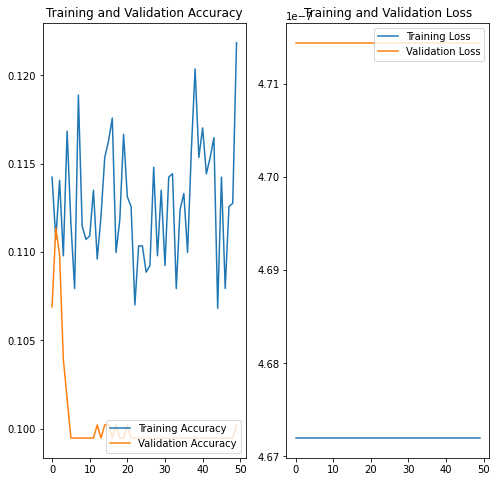

In [33]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [34]:
loss, accuracy = model3.evaluate(train_ds, verbose=1,)
loss_v, accuracy_v = model3.evaluate(val_ds, verbose=1)

print("Accuracy: ", accuracy)
print("Validation Accuracy: ",accuracy_v)
print("Loss: ",loss)
print("Validation Loss", loss_v)

43/43 [==============================] - 7s 138ms/step - loss: 4.7144e-07 - accuracy: 0.1002
Accuracy:  0.10051928460597992
Validation Accuracy:  0.10022271424531937
Loss:  4.671978786063846e-07
Validation Loss 4.7143871029220463e-07


#### **Todo:**  Analyze your results here. Did you get rid of underfitting/overfitting? Did class rebalance help?



## 1) The class rebalance helped in reducing overfititng of the data and thus the loss is beng reduced. But it reduced the Acurracy very low

## 2) Initially we tried without the ImageDataGenerator which created data to over fit at high ratio

## 3) Then we introduced dropout and ImageDataGenerator which reduced the over fit

## 4) At last we tried Batch Normalization and Augumentation which shows that the training accuracy and validation accuracy are very close, which suggests that the model may not be overfitting or underfitting. However, the accuracy is very low, which suggests that the model is not learning the patterns in the data very well.